# Breve ejemplo de regresión lineal

La regresión lineal es una forma de relacionar dos o más variables. 

En estadística, es un modelo matemático que permite analizar la relaci{on de dependencia entre una variable dependiente, **_Y_**, la variable (o variables) dependiente **_X_** y un término aleatorio **$\epsilon$**. 

$$Y_t = \beta_0 + \beta_1X_1 + \beta_2X2 + ... + \beta_pX_p + \epsilon$$

A continuación realizaremos un ejemplo donde relacionaremos la presión sistólica (**variable dependiente**) con la edad en años y el peso de los individuos registrados (**variables dependientes**).

In [2]:
# Libreria para abrir los datos
library(readxl) # Para leer datos de excel
library(ggplot2) # Para hacer graficos

## Abrimos los datos
Para abrir los datos, utilizamos la función `read_xls` de la librería `readxl`. 

In [11]:
# Abrimos los datos
datosPresion <- readxl::read_xls("datos/bloodPresureData.xls")

## Receta para hacer regresiones: 

Para hacer regresiones hay que seguir los siguientes pasos: 

**1. Escribir la fórmula de la regresión.** 

**Formato:** Escribimos primero la variable dependiente, después una tilde (~) y luego las variables independientes, sumandolas con el signo `+`. 

Ejemplo:

`formula <- var_dependiente ~ var_indep_1 + var_indep_2 `

**2. Utilizamos la función `lm(formula, data)` donde `formula` es la fórmula que escribimos en el paso 1, y `data` es la base de datos de donde se van a obtener los datos**

**3. Le damos enter, y listo! Fácil.**


In [ ]:
# Paso 1. Guardamos la fórmula
fmla <- sistolicBloodPressure ~ ageInYears + weightInPounds

In [12]:
# Paso 2. Usamos la función de regresión. 
modelo_regresion <- lm(fmla, datosPresion)
print(modelo_regresion) # Imprimimos


Call:
lm(formula = fmla, data = datosPresion)

Coefficients:
   (Intercept)      ageInYears  weightInPounds  
       30,9941          0,8614          0,3349  



In [6]:
summary(modelo_regresion) # Mostramos el sumario del modelo


Call:
lm(formula = fmla, data = datosPresion)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4640 -1.1949 -0.4078  1.8511  2.6981 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)     30.9941    11.9438   2.595  0.03186 * 
ageInYears       0.8614     0.2482   3.470  0.00844 **
weightInPounds   0.3349     0.1307   2.563  0.03351 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.318 on 8 degrees of freedom
Multiple R-squared:  0.9768,	Adjusted R-squared:  0.9711 
F-statistic: 168.8 on 2 and 8 DF,  p-value: 2.874e-07


**¿Cómo interpreto los P-valores en el análisis de regresión lineal?**

El p-valor para cada término comprueba la hipótesis nula de que el coeficiente es igual a cero (no tiene efecto). Un p-valor bajo (< 0.05) indica que puedes rechazar la hipótesis nula. En otras palabras, _un predictor que tenga un p-valor bajo es probable que tenga una adición significativa a su modelo porque los cambios en el valor del predictor están relacionados con cambios en la variable de respuesta_.

Recíprocamente, un p-valor grande (insignificante) sugiere que los cambios en el predictor no están asociados con cambios en la respuesta. Mas info en este [enlace](https://www.addlink.es/noticias/minitab/2540-como-interpretar-los-resultados-del-analisis-de-regresion-p-valores-y-coeficientes).

Entonces, el valor nos sirve para probar la siguiente hipótesis: 

$$H_0: \beta = 0 $$ vs. 

$$H_a: \beta \neq 0$$

**¿Cómo interpretamos la R²?**

$R^2$ nos  dice  qué  porcentaje  de  la  variabilidad  total en la variable Y puede  ser explicada  por  la  variable  regresora,  en  consecuencia  es  **una  medida  de  la  capacidad de PREDICCIÓN del modelo.** 

$R^2$ también puede verse como es una medida de la fuerza de la ASOCIACIÓN LINEAL  entre  X  e  Y.  (Hacemos  énfasis  en  la  palabra  lineal  porque  fue  obtenido bajo un modelo lineal) 


In [8]:
# Paso 3. Predecimos (obtenemos los modelos de la línea)
(datosPresion$prediccion <- predict(modelo_regresion)  )

1        2        3        4        5        6        7        8 
133.7183 143.4317 153.6716 164.5327 151.7570 168.4078 140.4640 146.4939 
       9       10       11 
156.3019 126.5407 165.6804

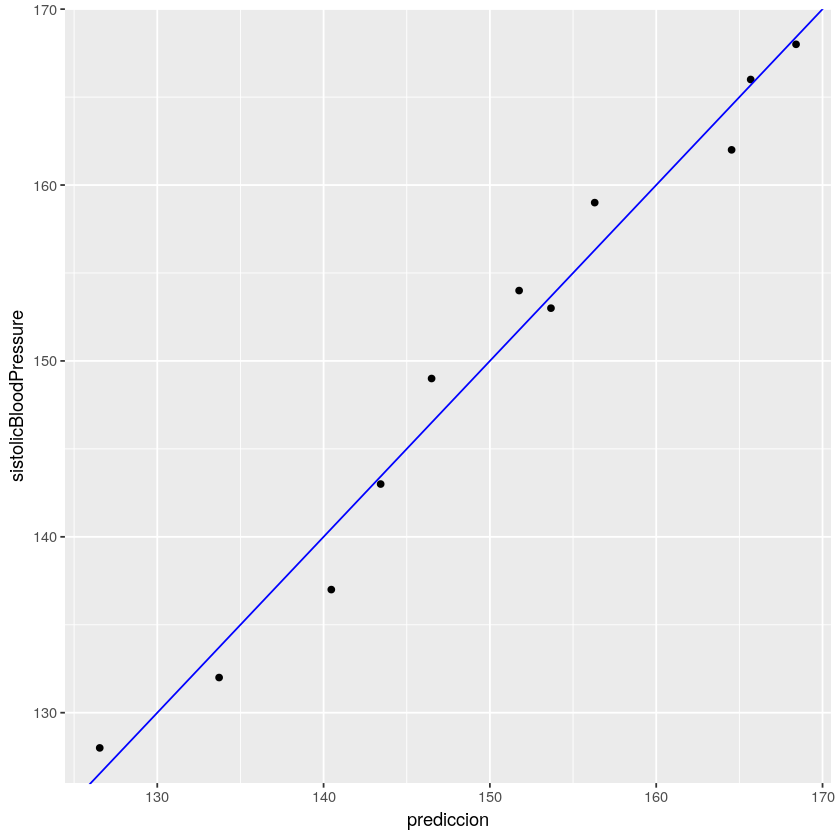

In [9]:
# Paso 4. Graficamos
ggplot(datosPresion, aes(x = prediccion, y = sistolicBloodPressure)) + 
  geom_point() + 
  geom_abline(color = "blue")

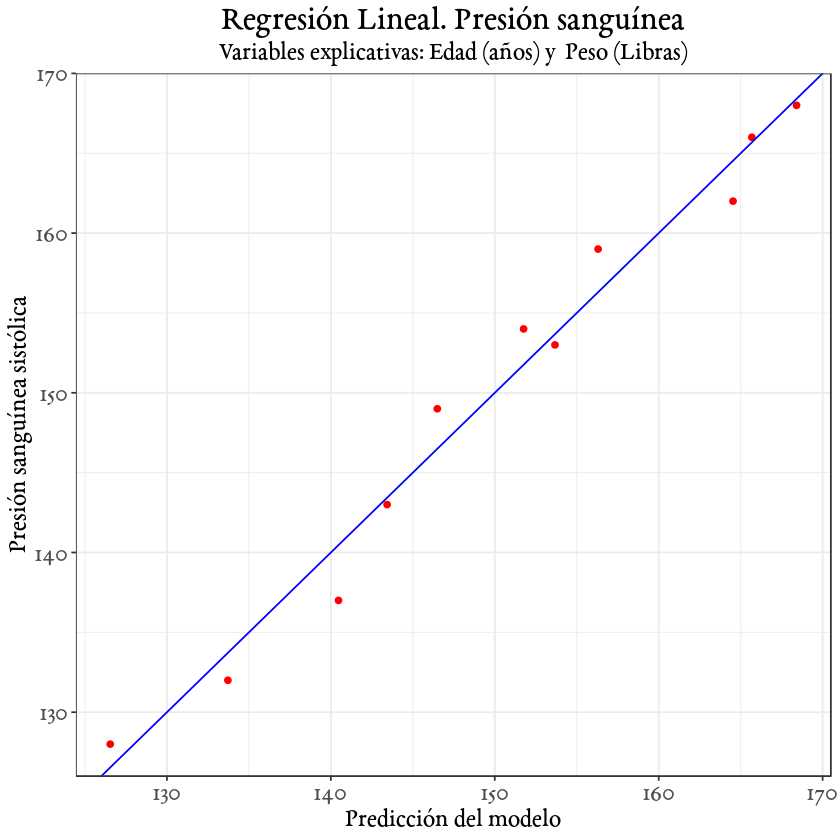

In [10]:
# Grafica mas bonita
ggplot(datosPresion, aes(x = prediccion, y = sistolicBloodPressure)) + 
  theme_bw() + # Fondo blanco con rayas grises
  theme(plot.title = element_text(family = "EBGaramond",  size = 20, hjust = 0.5), 
        plot.subtitle = element_text(family = "EBGaramond", size = 15, hjust = 0.5), 
        axis.title = element_text(family = "EBGaramond", size = 15, hjust = 0.5),
        axis.text = element_text(family = "EBGaramond", size = 15, hjust = 0.5)
        ) +
  geom_point(colour = "red") + 
  geom_abline(color = "blue") + 
  labs(title = "Regresión Lineal. Presión sanguínea",
       subtitle = "Variables explicativas: Edad (años) y  Peso (Libras)",
       x = "Predicción del modelo", 
       y = "Presión sanguínea sistólica") 

**Ejercicio:** Ahora, con los datos de la carpeta `Datos` de este mismo repositorio, obtenga los modelos de regresión y las gráficas de regresión. 